In [2]:
import os
if "models" not in os.listdir("."):
    os.chdir("../..")

In [60]:
import json

results = []

for i in range(4):
    with open(f"task_pair_metrics_use_sm_{i}.jsonl") as f:
        lines = f.readlines()
        results.extend([json.loads(line) for line in lines])


for i in range(4):
    with open(f"second/task_pair_metrics_use_sm_{i}.jsonl") as f:
        lines = f.readlines()
        results.extend([json.loads(line) for line in lines])

In [61]:
first_task = "antonyms"

task_results = [result for result in results if result["task_pair"][0] == first_task]

len(task_results)

44

In [62]:
from sprint.task_vector_utils import load_tasks, ICLRunner

# Load tasks
tasks = load_tasks()

fatal: destination path 'data/itv' already exists and is not an empty directory.


In [63]:
task_names = list(tasks.keys())

In [64]:
result_dict = {tuple(x["task_pair"]):x for x in results}

In [65]:
faithfulness_task = result_dict[(first_task, first_task)]["faithfullness"]
n_nodes_task = result_dict[(first_task, first_task)]["n_nodes_counts"]

In [66]:
for second_task in task_names:
    try:
        orig_metric = result_dict[(second_task, second_task)]["orig_metric"]
        zero_metric = result_dict[(second_task, second_task)]["zero_metric"]

        print(
            f"{second_task}: orig_metric: {orig_metric}, zero_metric: {zero_metric}"
        )
    except KeyError:
        print(f"No results for {second_task}")

location_continent: orig_metric: -1.8046875, zero_metric: -11.62646484375
football_player_position: orig_metric: -4.8125, zero_metric: -13.133999824523926
location_religion: orig_metric: -1.3828125, zero_metric: -9.184741973876953
location_language: orig_metric: -1.71875, zero_metric: -9.735681533813477
person_profession: orig_metric: -5.84375, zero_metric: -13.765823364257812
location_country: orig_metric: -4.96875, zero_metric: -11.202695846557617
country_capital: orig_metric: -2.15625, zero_metric: -11.799803733825684
person_language: orig_metric: -1.9453125, zero_metric: -9.03925609588623
singular_plural: orig_metric: -1.125, zero_metric: -10.057784080505371
present_simple_past_simple: orig_metric: -0.75390625, zero_metric: -6.042028427124023
antonyms: orig_metric: -1.28125, zero_metric: -6.890015602111816
plural_singular: orig_metric: -1.3359375, zero_metric: -8.106877326965332
present_simple_past_perfect: orig_metric: -2.453125, zero_metric: -7.625
present_simple_gerund: orig_met

In [67]:
import plotly.express as px
import numpy as np

first_task = "es_en"

faithfulness_task = result_dict[(first_task, first_task)]["faithfullness"]
n_nodes_task = result_dict[(first_task, first_task)]["n_nodes_counts"]

correct_metrics = {}

for task in task_names:
    orig_metric = result_dict[(task, task)]["orig_metric"]
    zero_metric = result_dict[(task, task)]["zero_metric"]

    correct_metrics[task] = (orig_metric, zero_metric)


fig = px.line(x=[max(n_nodes_task) - x for x in n_nodes_task], y=faithfulness_task)

for second_task in task_names:
    ablated_metrics_second = result_dict[(first_task, second_task)]["ablated_metrics"]
    n_nodes_second = result_dict[(first_task, second_task)]["n_nodes_counts"]

    orig_metric_second = result_dict[(first_task, second_task)]["orig_metric"]
    zero_metric_second = result_dict[(first_task, second_task)]["zero_metric"]

    cm = correct_metrics[second_task]

    faithfulness_second = (np.array(ablated_metrics_second) - cm[1]) / (cm[0] - cm[1])


    fig.add_scatter(x=[max(n_nodes_second) - x for x in n_nodes_second], y=faithfulness_second, name=second_task)

# fig.add_scatter(x=[max(n_nodes_second) - x for x in n_nodes_second], y=faithfulness_second)

fig.update_xaxes(title="Number of nodes")
fig.update_yaxes(title="Faithfullness")

fig


In [68]:
import plotly.express as px

# first_task = "location_continent"

# faithfulness_task = result_dict[(first_task, first_task)]["faithfullness"]
# n_nodes_task = result_dict[(first_task, first_task)]["n_nodes_counts"]


fig = px.line(x=[max(n_nodes_task) - x for x in n_nodes_task], y=faithfulness_task)

for second_task in task_names:
    # if second_task == "person_profession":
    #     continue
    faithfulness_second = result_dict[(second_task, second_task)]["faithfullness"]
    n_nodes_second = result_dict[(second_task, second_task)]["n_nodes_counts"]
    fig.add_scatter(x=[max(n_nodes_second) - x for x in n_nodes_second], y=faithfulness_second, name=second_task)

# fig.add_scatter(x=[max(n_nodes_second) - x for x in n_nodes_second], y=faithfulness_second)

fig.update_xaxes(title="Number of nodes")
fig.update_yaxes(title="Faithfullness")

fig


In [69]:
import plotly.express as px
import plotly

# first_task = "location_continent"

# faithfulness_task = result_dict[(first_task, first_task)]["faithfullness"]
# n_nodes_task = result_dict[(first_task, first_task)]["n_nodes_counts"]


fig = px.line(x=[None], y = [None])

for second_task in task_names:
    # if second_task == "person_profession":
    #     continue
    faithfulness_second = result_dict[(second_task, second_task)]["faithfullness"]
    thresholds = result_dict[(second_task, second_task)]["thresholds"]
    fig.add_scatter(x=thresholds, y=faithfulness_second, name=second_task)

# fig.add_scatter(x=[max(n_nodes_second) - x for x in n_nodes_second], y=faithfulness_second)

fig.update_xaxes(title="Threshold")
fig.update_yaxes(title="Faithfullness")
fig.update_layout(xaxis_type="log")

fig


In [73]:
import numpy as np 

# task_names = [x for x in task_names if x not in ["person_profession", "football_player_position", "location_continent"]]
heatmap_data = np.zeros((len(task_names), len(task_names)))

correct_metrics = {}

for task in task_names:
    orig_metric = result_dict[(task, task)]["orig_metric"]
    zero_metric = result_dict[(task, task)]["zero_metric"]

    correct_metrics[task] = (orig_metric, zero_metric)


for i, first_task in enumerate(task_names):
    _faith = result_dict[(first_task, first_task)]["faithfullness"]
    print(
        first_task, max(_faith), min(_faith), _faith
    )
    idx = [i for i, x in enumerate(_faith) if x > 0.2][0]
    for j, second_task in enumerate(task_names):
        if first_task == second_task:
            faith = _faith
        else:
            ablated_metrics = result_dict[(first_task, second_task)]["ablated_metrics"]
            orig_metric_second = result_dict[(first_task, second_task)]["orig_metric"]
            zero_metric_second = result_dict[(first_task, second_task)]["zero_metric"]

            ablated_metrics = np.array(ablated_metrics)
            cm = correct_metrics[second_task]


            faith = (ablated_metrics - cm[1]) / (cm[0] - cm[1])

        heatmap_data[i, j] = faith[idx]

heatmap_data = np.flip(heatmap_data, axis=0)

zmin = (heatmap_data - 1).min()

fig = px.imshow(heatmap_data - 1, x=task_names, y=task_names[::-1], color_continuous_scale="RdBu", width=800,  height=600, 
                labels=dict(x="Tested task", y="Ablated task", color="Faithfullness change"), zmin=zmin, zmax=abs(zmin)) 

fig.update_layout(width =400, height=300, 
                font_family="Serif", font_size=7, 
                margin_l=5, margin_t=5, margin_b=5, margin_r=5)

import plotly.io as pio

# pio.kaleido.scope.mathjax = None
pio.write_image(fig, "micrlhf-progress/images/circuit-ablation-new.pdf", width =400, height=300)
pio.write_image(fig, "micrlhf-progress/images/circuit-ablation-new.pdf", width =400, height=300)

fig

location_continent 0.9997316941259632 0.1344264619065374 [0.13981753355704699, 0.1344264619065374, 0.13580612649142432, 0.14169327150136715, 0.13874664041138454, 0.1502905170270942, 0.1545622436614467, 0.15110526581531195, 0.14652418515411383, 0.15361301423067364, 0.15040072318543377, 0.15240511589609743, 0.15603347160079542, 0.16495162580785483, 0.1723121349117574, 0.17548587807606264, 0.17333826590852597, 0.16850706096196869, 0.1632042513360676, 0.163848399049217, 0.1637346973651504, 0.15987194724086504, 0.16662258420333084, 0.16923432450907283, 0.17716975049714143, 0.18803840805990554, 0.18931243008948545, 0.19765586160825255, 0.1948769186552324, 0.20332667241486452, 0.19738670612726822, 0.2028061303753418, 0.1936806720730798, 0.19085580179592343, 0.19204262987820034, 0.19200612105393985, 0.19783656086875467, 0.19329441648023862, 0.20273563727317923, 0.20439368164305244, 0.20457641996022868, 0.21550022915113098, 0.21456750636962466, 0.21800487043251304, 0.21861619904300272, 0.221547

location_continent 0.1344264619065374 0.1545622436614467
football_player_position 0.13287457489205767 0.14556119978569115
location_religion 0.17221176699528512 0.1926489649814275
location_language 0.07729502964540427 0.1019357719784135
person_profession 0.1330944795745607 0.16012382964707877
location_country 0.14720000685354195 0.17938166977370767
country_capital 0.2131935535199321 0.24298875029556471
person_language 0.2115059153417089 0.23830291136471826
singular_plural 0.26032532471671194 0.278995287883047
present_simple_past_simple 0.34208632717270593 0.3713490067985597
antonyms 0.16092562134673827 0.25459883558113905
plural_singular 0.2153504759610949 0.22720735452675375
present_simple_past_perfect 0.18126888217522658 0.2054380664652568
present_simple_gerund 0.1490893689114782 0.15586615840745446
en_it 0.08494208494208494 0.09266409266409266
it_en 0.22641509433962265 0.2490566037735849
en_fr 0.04809619238476954 0.056112224448897796
en_es 0.1073512252042007 0.12602100350058343
fr_en

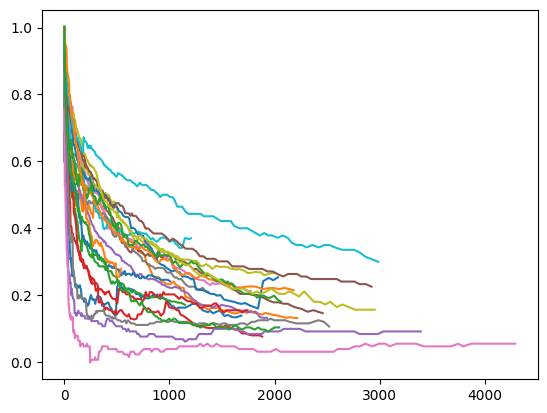

In [14]:
import matplotlib.pyplot as plt

plot_data = []

for i, first_task in enumerate(task_names):
    _faith = result_dict[(first_task, first_task)]["faithfullness"]
    n_nodes_task = result_dict[(first_task, first_task)]["n_nodes_counts"]

    print(first_task, min(_faith[:10]), max(_faith[:10]))

    plt.plot([max(n_nodes_task) - x for x in n_nodes_task]  , _faith, label=first_task)

plt.show()

In [15]:
import json

cleanup_results = []

with open("cleanup_results_final.jsonl") as f:
    lines = f.readlines()
    cleanup_results.extend([json.loads(line) for line in lines])

[x for x in cleanup_results if x["task"] == "person_profession" and x["layer"] == 12][0]["tv_loss"]

FileNotFoundError: [Errno 2] No such file or directory: 'cleanup_results_final.jsonl'

In [92]:
import json
import plotly.express as px

results = []

run_tag = "later_no_prompt_inverse"

for i in range(4):
    with open(f"task_faithfulness_metrics_use_sm_{run_tag}_{i}.jsonl") as f:
        lines = f.readlines()
        results.extend([json.loads(line) for line in lines])

# for i in range(4):
#     with open(f"task_faithfulness_metrics_use_sm_{run_tag}_2_{i}.jsonl") as f:
#         lines = f.readlines()
#         results.extend([json.loads(line) for line in lines])

# for i in range(4):
#     with open(f"faith_extra/task_faithfulness_metrics_new_thinner_{i}.jsonl") as f:
#         lines = f.readlines()
#         results.extend([json.loads(line) for line in lines])

print(len(results))


# inverse_results = [x for x in results if x["inverse"]]

# print(inverse_results[0])



# inverse_results = {x["task"]: x for x in inverse_results}
non_inverse_results = [x for x in results if x["inverse"]]

import matplotlib.pyplot as plt

plot_data = []

fig = px.line(x=[None], y = [None])

from collections import defaultdict

c = defaultdict(int)

for r in non_inverse_results:
    task_name = r["task"]


    _metrics = np.array(r["ablated_metrics"])
    _orig_metric = r["orig_metric"]

    
    _faith = r["faithfullness"]


    if task_name in ["person_profession"]:
        _faith = (_metrics - min(_metrics)) / (max(_metrics) - min(_metrics))

    _ths = r["thresholds"]
    n_nodes_task = r["n_nodes_counts"]

    fig.add_scatter(x=[x for x in n_nodes_task], y=_faith, name=str(task_name)[:40])
    # fig.add_scatter(x=n_nodes_task, y=_faith, name=str(task_name)[:40])
    # fig.add_scatter(x=_ths, y=_faith, name=first_task)

    plot_data.append((_faith, [max(n_nodes_task) - x for x in n_nodes_task]))


fig
# plt.show()

8


In [8]:
import json
import plotly.express as px

results = []

for i in range(4):
    with open(f"task_faithfulness_metrics_use_sm_{i}.jsonl") as f:
        lines = f.readlines()
        results.extend([json.loads(line) for line in lines])


# for i in range(4):
#     with open(f"faith_extra/task_faithfulness_metrics_new_thinner_{i}.jsonl") as f:
#         lines = f.readlines()
#         results.extend([json.loads(line) for line in lines])

print(len(results))


# inverse_results = [x for x in results if x["inverse"]]

# print(inverse_results[0])



# inverse_results = {x["task"]: x for x in inverse_results}
non_inverse_results = [x for x in results if not x["inverse"]]

import matplotlib.pyplot as plt

plot_data = []

fig = px.line(x=[None], y = [None])

from collections import defaultdict

c = defaultdict(int)

for r in non_inverse_results:
    print(r["orig_metric"], r["zero_metric"])   
    print(max(r["ablated_metrics"]))

fig

23
-1.8046875 -11.62646484375
-1.3886475563049316
-5.84375 -13.765823364257812
-3.9509501457214355
-1.125 -10.057784080505371
-3.676290273666382
-2.453125 -7.6363043785095215
-4.230353355407715
-5.28125 -20.936979293823242
-4.422189712524414
-0.56640625 -7.663100719451904
-2.1502695083618164
-4.8125 -13.133999824523926
-4.509071350097656
-4.96875 -11.202695846557617
-4.3645243644714355
-0.75390625 -6.042028427124023
-3.9614880084991455
-0.71484375 -9.952646255493164
-3.2322311401367188
-2.546875 -15.957269668579102
-3.7918121814727783
-0.2138671875 -5.585310459136963
-1.398303747177124
-1.3828125 -9.184741973876953
-1.9923434257507324
-2.15625 -11.799803733825684
-4.141630172729492
-1.28125 -6.890015602111816
-3.2340991497039795
-3.3125 -19.487552642822266
-4.164235591888428
-4.125 -12.111248016357422
-3.478390693664551
-2.078125 -11.590578079223633
-2.431708335876465
-1.71875 -9.735681533813477
-2.2759368419647217
-1.9453125 -9.03925609588623
-2.42812442779541
-1.3359375 -8.1068773269

In [86]:
import json
import plotly.express as px
import numpy as np

results = []

run_tag = "later_no_prompt"

for i in range(4):
    with open(f"task_faithfulness_metrics_use_sm_{run_tag}_{i}.jsonl") as f:
        lines = f.readlines()
        results.extend([json.loads(line) for line in lines])

for i in range(4):
    with open(f"task_faithfulness_metrics_use_sm_{run_tag}_2_{i}.jsonl") as f:
        lines = f.readlines()
        results.extend([json.loads(line) for line in lines])

# for i in range(4):
#     with open(f"task_faithfulness_metrics_new_wide_{i}.jsonl") as f:
#         lines = f.readlines()
#         results.extend([json.loads(line) for line in lines])

print(len(results))


inverse_results = [x for x in results if x["inverse"]]

# print(inverse_results[0])



# inverse_results = {x["task"]: x for x in inverse_results}
non_inverse_results = [x for x in results if not x["inverse"]]
# non_inverse_results = {x["task"]: x for x in non_inverse_results}

import matplotlib.pyplot as plt

plot_data = []

fig = px.line(x=[None], y = [None])

for x in non_inverse_results:

    _faith = x["faithfullness"]
    _metrics = np.array(x["ablated_metrics"])
    _ths = x["thresholds"]
    n_nodes_task = x["n_nodes_counts"]
    task_name = x["task"]

    # if task_name in ["algo_first"]:
    #     continue

    # if task_name in ["person_profession"]:
    #     _faith = (_metrics - min(_metrics)) / (max(_metrics) - min(_metrics))


    # _faith = [min(1, x) for x in _faith]
    # _faith = list(_faith)

    # fig.add_scatter(x=n_nodes_task, y=_faith, name=first_task)

    plot_data.append((_faith, n_nodes_task))

    # print(first_task, min(_faith[:100]), max(_faith[:10]))

    # plt.plot(n_nodes_task  , _faith, label=first_task)

# fig.update_layout(xaxis_type="log")

def interpolate(x, y, x_new):

    max_x = max(x)
    max_x_new = max(x_new)

    print(y[-10:])

    if max_x_new > max_x:
        x = x + [max_x_new]
        y = y + [y[0]]

    from scipy.interpolate import interp1d
    f = interp1d(x, y)
    return f(x_new)

#average across all tasks

n_nodes = []
for faith, n_nodes_task in plot_data:
    n_nodes.extend(n_nodes_task)

n_nodes = sorted(list(set(n_nodes)))

# # faith = np.zeros(len(n_nodes))


new_faiths = []

for faith, n_nodes_task in plot_data:
    faith = interpolate(n_nodes_task, faith, n_nodes)
    
    new_faiths.append(faith)

faith = np.mean(new_faiths, axis=0)

n_nodes = np.array(n_nodes)


fig = px.line(x=n_nodes[n_nodes < 2000], y=faith[n_nodes < 2000], labels=dict(x="Number of nodes", y="Faithfullness"))

fig.update_layout(width =300, height=200, 
                font_family="Serif", font_size=12, 
                margin_l=5, margin_t=5, margin_b=5, margin_r=5, xaxis=dict(dtick=500))


pio.write_image(fig, "micrlhf-progress/images/faith-nodes.pdf", width =300, height=200)

# fig.update_layout(width =400, height=300, 
#                 font_family="Serif", font_size=12, 
#                 margin_l=5, margin_t=5, margin_b=5, margin_r=5)

# import plotly.io as pio
# pio.write_image(fig, "micrlhf-progress/images/faith-nodes-inverse.pdf", width =400, height=300)

fig

23
[0.03617347714101561, 0.03617347714101561, 0.03617347714101561, 0.03617347714101561, 0.03617347714101561, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [94]:
import json
import plotly.express as px
import numpy as np

results = []

run_tag = "later_no_prompt_inverse"

for i in range(4):
    with open(f"task_faithfulness_metrics_use_sm_{run_tag}_{i}.jsonl") as f:
        lines = f.readlines()
        results.extend([json.loads(line) for line in lines])

for i in range(4):
    with open(f"task_faithfulness_metrics_use_sm_{run_tag}_2_{i}.jsonl") as f:
        lines = f.readlines()
        results.extend([json.loads(line) for line in lines])

# for i in range(4):
#     with open(f"task_faithfulness_metrics_new_wide_{i}.jsonl") as f:
#         lines = f.readlines()
#         results.extend([json.loads(line) for line in lines])

print(len(results))


# inverse_results = [x for x in results if x["inverse"]]

# print(inverse_results[0])



# inverse_results = {x["task"]: x for x in inverse_results}
non_inverse_results = [x for x in results if x["inverse"]]
# non_inverse_results = {x["task"]: x for x in non_inverse_results}

import matplotlib.pyplot as plt

plot_data = []

fig = px.line(x=[None], y = [None])

for x in non_inverse_results:

    _faith = x["faithfullness"]
    _metrics = np.array(x["ablated_metrics"])
    _orig_metric = x["orig_metric"]
    _ths = x["thresholds"]
    n_nodes_task = x["n_nodes_counts"]
    task_name = x["task"]

    _faith = (_metrics - min(_metrics)) / (_orig_metric - min(_metrics))

    # if task_name in ["algo_first"]:
    #     continue

    # if task_name in ["person_profession"]:
    #     _faith = (_metrics - min(_metrics)) / (max(_metrics) - min(_metrics))


    # _faith = [min(1, x) for x in _faith]
    # _faith = list(_faith)

    # fig.add_scatter(x=n_nodes_task, y=_faith, name=first_task)

    plot_data.append((_faith, [max(n_nodes_task) - x for x in n_nodes_task]))

    # print(first_task, min(_faith[:100]), max(_faith[:10]))

    # plt.plot(n_nodes_task  , _faith, label=first_task)

# fig.update_layout(xaxis_type="log")

def interpolate(x, y, x_new):

    max_x = max(x)
    max_x_new = max(x_new)

    print(y[-10:])

    if max_x_new > max_x:
        x = x + [max_x_new]
        y = y + [y[0]]

    from scipy.interpolate import interp1d
    f = interp1d(x, y)
    return f(x_new)

#average across all tasks

n_nodes = []
for faith, n_nodes_task in plot_data:
    n_nodes.extend(n_nodes_task)

n_nodes = sorted(list(set(n_nodes)))

# # faith = np.zeros(len(n_nodes))


new_faiths = []

for faith, n_nodes_task in plot_data:
    faith = interpolate(n_nodes_task, faith, n_nodes)
    
    new_faiths.append(faith)

faith = np.mean(new_faiths, axis=0)

n_nodes = np.array(n_nodes)


fig = px.line(x=n_nodes[n_nodes < 2000], y=faith[n_nodes < 2000], labels=dict(x="Number of nodes", y="Faithfullness"))

fig.update_layout(width =300, height=200, 
                font_family="Serif", font_size=12, 
                margin_l=5, margin_t=5, margin_b=5, margin_r=5, xaxis=dict(dtick=500))


pio.write_image(fig, "micrlhf-progress/images/faith-nodes-inverse.pdf", width =300, height=200)

# fig.update_layout(width =400, height=300, 
#                 font_family="Serif", font_size=12, 
#                 margin_l=5, margin_t=5, margin_b=5, margin_r=5)

# import plotly.io as pio
# pio.write_image(fig, "micrlhf-progress/images/faith-nodes-inverse.pdf", width =400, height=300)

fig

23
[-0.23565861895105095, -0.23565861895105095, -0.23565861895105095, -0.23565861895105095, -0.23565861895105095, 0.9959792392144134, 0.9959792392144134, 0.9959792392144134, 0.9959792392144134, 0.9959792392144134]
[1.0037315235046365, 1.0037315235046365, 1.0037315235046365, 1.0037315235046365, 1.0037315235046365, 1.0037315235046365, 1.0037315235046365, 1.0037315235046365, 1.0037315235046365, 1.0037315235046365]
[1.0011259293418613, 1.0011259293418613, 1.0011259293418613, 1.0011259293418613, 1.0011259293418613, 1.0011259293418613, 1.0011259293418613, 1.0011259293418613, 1.0011259293418613, 1.0011259293418613]
[0.998188139398452, 0.998188139398452, 0.998188139398452, 0.998188139398452, 0.998188139398452, 0.998188139398452, 0.998188139398452, 0.998188139398452, 0.998188139398452, 0.998188139398452]
[1.0057631275430063, 1.0057631275430063, 1.0057631275430063, 1.0057631275430063, 1.0057631275430063, 1.0057631275430063, 1.0057631275430063, 1.0057631275430063, 1.0057631275430063, 1.0057631275

In [80]:
fig = px.line(x=[max(n_nodes_task) - x for x in n_nodes_task], y=faithfulness_task)


plot_data = []


for second_task in task_names:
    # if second_task == "person_profession":
    #     continue
    faithfulness_second = result_dict[(second_task, second_task)]["faithfullness"]
    n_nodes_second = result_dict[(second_task, second_task)]["n_nodes_counts"]
    fig.add_scatter(x=[max(n_nodes_second) - x for x in n_nodes_second], y=faithfulness_second, name=second_task)

# fig.add_scatter(x=[max(n_nodes_second) - x for x in n_nodes_second], y=faithfulness_second)

# fig.update_xaxes(title="Number of nodes")
# fig.update_yaxes(title="Faithfullness")


# fig.update_layout(xaxis_type="log")
    plot_data.append((_faith, [max(n_nodes_task) - x for x in n_nodes_task]))


def interpolate(x, y, x_new):

    max_x = max(x)
    max_x_new = max(x_new)

    print(y[-10:])

    if max_x_new > max_x:
        x = x + [max_x_new]
        y = y + [y[0]]

    from scipy.interpolate import interp1d
    f = interp1d(x, y)
    return f(x_new)

#average across all tasks

n_nodes = []
for faith, n_nodes_task in plot_data:
    n_nodes.extend(n_nodes_task)

n_nodes = sorted(list(set(n_nodes)))

# faith = np.zeros(len(n_nodes))


new_faiths = []

for faith, n_nodes_task in plot_data:
    faith = interpolate(n_nodes_task, faith, n_nodes)
    
    new_faiths.append(faith)

faith = np.mean(new_faiths, axis=0)

n_nodes = np.array(n_nodes)

# fig = px.imshow(heatmap_data - 1, x=task_names, y=task_names[::-1], color_continuous_scale="RdBu", width=800,  height=600, 
#                 labels=dict(x="Tested task", y="Ablated task", color="Faithfullness"))

fig = px.line(x=n_nodes[n_nodes < 5000], y=faith[n_nodes < 5000], labels=dict(x="Number of nodes", y="Faithfullness"))

fig.update_layout(width =400, height=300, 
                font_family="Serif", font_size=12, 
                margin_l=5, margin_t=5, margin_b=5, margin_r=5)


pio.write_image(fig, "micrlhf-progress/images/faith-nodes-inverse.pdf", width =400, height=300)

fig

ValueError: All arguments should have the same length. The length of argument `y` is 300, whereas the length of  previously-processed arguments ['x'] is 400